In [1]:
from data_cleaning import get_data_cleaned
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
glassdoor_df, h1bdata_df, salary_ai_df = get_data_cleaned()

# Taking a look at dataset types

In [3]:
glassdoor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Job Title           742 non-null    object 
 1   Salary Estimate     742 non-null    object 
 2   Job Description     742 non-null    object 
 3   Rating              742 non-null    float64
 4   Location            742 non-null    object 
 5   Headquarters        742 non-null    object 
 6   Size                742 non-null    object 
 7   Founded             742 non-null    int64  
 8   Type of ownership   742 non-null    object 
 9   Sector              742 non-null    object 
 10  Revenue             742 non-null    object 
 11  Lower Salary        742 non-null    int64  
 12  Upper Salary        742 non-null    int64  
 13  Avg Salary(K)       742 non-null    float64
 14  company_txt         742 non-null    object 
 15  Job Location        742 non-null    object 
 16  Age     

In [4]:
glassdoor_df['job_title_sim'].value_counts()

data scientist                    313
other scientist                   143
data engineer                     119
analyst                           101
machine learning engineer          22
Data scientist project manager     16
na                                 10
data analitics                      8
data modeler                        5
director                            5
Name: job_title_sim, dtype: int64

In [5]:
glassdoor_df['job_title_sim'] = glassdoor_df['job_title_sim'].apply(lambda x: 'others' if x=='na'  else x)

In [6]:
glassdoor_df['job_title_sim'].value_counts()

data scientist                    313
other scientist                   143
data engineer                     119
analyst                           101
machine learning engineer          22
Data scientist project manager     16
others                             10
data analitics                      8
data modeler                        5
director                            5
Name: job_title_sim, dtype: int64

In [7]:
glassdoor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Job Title           742 non-null    object 
 1   Salary Estimate     742 non-null    object 
 2   Job Description     742 non-null    object 
 3   Rating              742 non-null    float64
 4   Location            742 non-null    object 
 5   Headquarters        742 non-null    object 
 6   Size                742 non-null    object 
 7   Founded             742 non-null    int64  
 8   Type of ownership   742 non-null    object 
 9   Sector              742 non-null    object 
 10  Revenue             742 non-null    object 
 11  Lower Salary        742 non-null    int64  
 12  Upper Salary        742 non-null    int64  
 13  Avg Salary(K)       742 non-null    float64
 14  company_txt         742 non-null    object 
 15  Job Location        742 non-null    object 
 16  Age     

In [8]:
h1bdata_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4587 entries, 0 to 4660
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4587 non-null   int64 
 1   company     4587 non-null   object
 2   title       4587 non-null   object
 3   salary      4587 non-null   object
 4   location    4587 non-null   object
 5   date        4587 non-null   object
dtypes: int64(1), object(5)
memory usage: 250.9+ KB


In [9]:
salary_ai_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           245 non-null    int64 
 1   experience_level    245 non-null    object
 2   employment_type     245 non-null    object
 3   job_title           245 non-null    object
 4   salary              245 non-null    int64 
 5   salary_currency     245 non-null    object
 6   salary_in_usd       245 non-null    int64 
 7   employee_residence  245 non-null    object
 8   remote_ratio        245 non-null    int64 
 9   company_location    245 non-null    object
 10  company_size        245 non-null    object
dtypes: int64(4), object(7)
memory usage: 21.2+ KB


In [10]:
glassdoor_df['Location'].apply(lambda x: x.split(',')[1].strip())

0      NM
1      MD
2      FL
3      WA
4      NY
       ..
737    MA
738    TN
739    PA
740    PA
741    OH
Name: Location, Length: 742, dtype: object

In [11]:
glassdoor_df[glassdoor_df["Location"].apply(lambda x: str(x).split(',')[1].strip()) != glassdoor_df['Location'].apply(lambda x: x.split(',')[1].strip())]['Location'] =  'Santa Fe Springs, CA'

In [12]:
glassdoor_df['Location'].loc[126] =  [ 'Santa Fe Springs, CA']
glassdoor_df['Location'].loc[126]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


['Santa Fe Springs, CA']

## Separating columns from states in differente columns

In [13]:
glassdoor_df["Job City"] =  glassdoor_df["Location"].apply(lambda x: str(x).upper().split(',')[0].strip())
h1bdata_df['Job City'] = h1bdata_df["location"].apply(lambda x: str(x).upper().split(',')[0].strip())

## Transform anual salary in month salary

In [14]:
glassdoor_df['Avg Month Salary(K)']=glassdoor_df['Avg Salary(K)'].apply(lambda x: round(x/13,2))
h1bdata_df['Month Salary']=h1bdata_df['salary'].apply(lambda x: round(float(x.split(',')[0])*1000/13,2))
salary_ai_df['Month Salary'] = salary_ai_df['salary_in_usd'].apply(lambda x: round(float(x)/13,2))

## transform date in strings to date

In [15]:
from datetime import datetime
h1bdata_df['date'] = pd.to_datetime( h1bdata_df['date'])
h1bdata_df['year'] = [i.year for i in h1bdata_df['date']]

## sorting h1bdata_df by company and year

In [16]:
h1bdata_df.sort_values(by=['year','company'], inplace=True, ascending=True)
h1bdata_df.head(10)

,Unnamed: 0,company,title,salary,location,date,Job City,Month Salary,year
3155,3155,AIRBNB INC,DATA SCIENTIST,"160,000","SAN FRANCISCO, CA",2014-09-26,SAN FRANCISCO,12307.69,2014
391,391,APPNEXUS INC,DATA SCIENTIST,"110,000","NEW YORK, NY",2014-10-24,NEW YORK,8461.54,2014
459,459,AXIAL NETWORKS INC (FORMERLY AXIAL MARKET),DATA SCIENTIST,"115,000","NEW YORK, NY",2014-12-15,NEW YORK,8846.15,2014
1901,1901,C1X INC,DATA SCIENTIST,"110,000","SAN JOSE, CA",2014-10-23,SAN JOSE,8461.54,2014
828,828,CANVAS FRG LLC,DATA SCIENTIST,"150,000","NEW YORK, NY",2014-10-31,NEW YORK,11538.46,2014
758,758,FACEBOOK INC,DATA SCIENTIST,"140,000","NEW YORK, NY",2014-11-07,NEW YORK,10769.23,2014
3619,3619,FACEBOOK INC,DATA SCIENTIST,"112,000","SEATTLE, WA",2014-12-17,SEATTLE,8615.38,2014
103,103,FINO CONSULTING LLC,DATA SCIENTIST,"82,000","NEW YORK, NY",2014-10-16,NEW YORK,6307.69,2014
350,350,GROUPON INC,DATA SCIENTIST,"105,000","NEW YORK, NY",2014-10-21,NEW YORK,8076.92,2014
935,935,INTENT MEDIA INC,DATA SCIENTIST,"163,000","NEW YORK, NY",2014-10-07,NEW YORK,12538.46,2014


In [17]:
h1bdata_df['Job City']

3155    SAN FRANCISCO
391          NEW YORK
459          NEW YORK
1901         SAN JOSE
828          NEW YORK
            ...      
88           NEW YORK
3597          SEATTLE
4312        MILWAUKEE
620          NEW YORK
1825         SAN JOSE
Name: Job City, Length: 4587, dtype: object

## Let's define explicity columns for companies sizes

In [18]:
def remake_company_size_company(x):
    mapper = {
        'L': 'LARGER',
        'M': 'MEDIUM',
        'S': 'SMALL'
    }
    return mapper[x]

def define_company_size(x,y):
    revenue = x.lower()
    headcount = y.lower()
    mapper = {
        '$10+ billion (usd)': 'LARGE',
        '$5 to $10 billion (usd)': 'LARGE',
        '$1 to $2 billion (usd)': 'LARGE',
        '$2 to $5 billion (usd)': 'LARGE',
        '$500 million to $1 billion (usd)': 'LARGE',
        '$100 to $500 million (usd)': 'MEDIUM',
        '$50 to $100 million (usd)':  'MEDIUM',
        '$25 to $50 million (usd)': 'MEDIUM',
        '$10 to $25 million (usd)': 'SMALL',
        '$5 to $10 million (usd)': 'SMALL',
        '$1 to $5 million (usd)': 'SMALL',
        'less than $1 million (usd)': 'MICRO'
    }
    classification = 'na' if  ('unknow' in revenue or 'unknow' in headcount) else mapper[revenue]
    return classification
    
    

In [19]:
salary_ai_df['Company Size'] = salary_ai_df['company_size'].apply(remake_company_size_company)


In [20]:
glassdoor_df['Company Size'] = glassdoor_df[['Revenue','Size']].apply(lambda x: define_company_size(x["Revenue"],x["Size"]), axis =1)

In [21]:
glassdoor_df

,Job Title,Salary Estimate,Job Description,Rating,Location,Headquarters,Size,Founded,Type of ownership,Sector,...,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree,Job City,Avg Month Salary(K),Company Size
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,Aerospace & Defense,...,1,0,0,0,data scientist,na,M,ALBUQUERQUE,5.54,MEDIUM
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,Health Care,...,0,0,0,0,data scientist,na,M,LINTHICUM,6.73,LARGE
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,Company - Private,Business Services,...,0,0,0,0,data scientist,na,M,CLEARWATER,6.54,MEDIUM
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,Government,"Oil, Gas, Energy & Utilities",...,0,0,0,0,data scientist,na,na,RICHLAND,5.88,LARGE
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,"New York, NY","New York, NY",51 - 200,1998,Company - Private,Business Services,...,0,0,0,0,data scientist,na,na,NEW YORK,8.81,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,"Cambridge, MA","Brentford, United Kingdom",10000+,1830,Company - Public,Biotech & Pharmaceuticals,...,0,0,0,0,other scientist,sr,M,CAMBRIDGE,6.50,LARGE
738,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,"Nashville, TN","San Francisco, CA",1001 - 5000,2006,Company - Public,Information Technology,...,0,0,0,0,data engineer,sr,na,NASHVILLE,7.88,MEDIUM
739,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,"Pittsburgh, PA","Pittsburgh, PA",501 - 1000,1984,College / University,Education,...,0,0,0,0,other scientist,na,P,PITTSBURGH,5.65,na
740,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Allentown, PA","Chadds Ford, PA",1 - 50,-1,Company - Private,Business Services,...,0,0,0,0,data scientist,na,na,ALLENTOWN,9.81,SMALL


## Classify as american and non american companies

In [22]:
def classify_companies_origen(x):
    USA_STATES = ['AL','AK','AZ','AR','CA','CZ','CO','CT','DE','DC','FL','GA','GU','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','PR','RI','SC','SD','TN','TX','UT','VT','VI','VA','WA','WV','WI','WY']
    if x=='-1':
        return 'na'
    location = x.split(', ')[1].strip()
    
    
    return 'USA' if location in  USA_STATES else location

<Figure size 2160x2160 with 0 Axes>

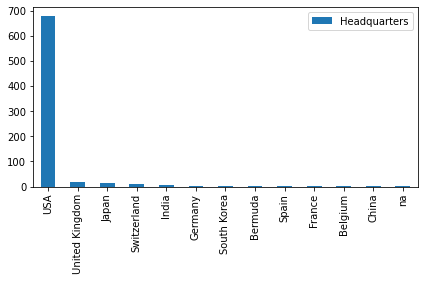

In [23]:
plt.figure(figsize=(30,30))
pd.DataFrame(glassdoor_df['Headquarters'].apply(classify_companies_origen).value_counts()).plot.bar()
plt.tight_layout()

I have to make a little comment here, the glassdoor dataset only serve to analyse sallaries in USA, in global terms it's not representative.

# Data analysis

### How is it distributed range salaries per data science job role in 2021 at USA?  what about the average monthly salaries?

In [95]:
glassdoor_df['Frequency'] = 1
salary_range_groups = glassdoor_df[['job_title_sim', 'Avg Salary(K)','Frequency']].groupby(['job_title_sim','Avg Salary(K)']).sum()
job_roles = glassdoor_df['job_title_sim'].unique()

salary_range_groups.loc['Data scientist project manager']['Frequency']



Avg Salary(K)
40.5     1
61.5     3
63.0     2
64.0     4
74.0     1
87.5     2
96.5     1
109.5    2
Name: Frequency, dtype: int64

In [193]:
def groupby_range(df,job_role):
    freq_df = df.loc[job_role].reset_index()
    min_salary = freq_df["Avg Salary(K)"].min()
    max_salary = freq_df["Avg Salary(K)"].max()
   
    tmp_df = freq_df.groupby(pd.cut(freq_df['Avg Salary(K)'].values,np.arange(min_salary, max_salary, 10))).sum()
    
    # getting rid of range that never occurs
    tmp_df = tmp_df[tmp_df['Frequency'] > 0]
    
    return tmp_df

<AxesSubplot:>

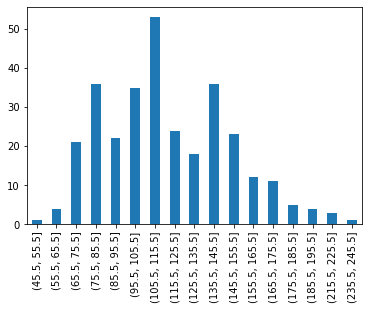

In [211]:
#tmp_df =  salary_range_groups
#tmp_df.reset_index()['job_title_sim'].unique()
#tmp_df.loc['Data scientist project manager']
#groupby_range(tmp_df,'Data scientist project manager')
#tmp_df[tmp_df['Frequency'] > 0]
groupby_range(salary_range_groups,'data scientist')['Frequency'].plot.bar()
#salary_range_groups
#salary_range_groups.loc['Data scientist project manager']. reset_index()["Avg Salary(K)"].min()
#pd.cut(salary_range_groups.loc['Data scientist project manager'].reset_index()['Avg Salary(K)'].values,np.arange(0, 200, 10))

In [214]:
def print_salaryFreqDistJobRole(salary_groups,job_roles):
   
    for i,job_role in zip([k for k in range(1,len(job_roles))], job_roles):
        
        plt.figure()
        if( len(salary_groups.loc[job_role].values) > 20):
            print(job_role)
            tmp_df = groupby_range(salary_groups,job_role)
            ax = tmp_df['Frequency'].plot(figsize=(150,50), kind='bar')
        else:
            ax = salary_groups.loc[job_role].plot(figsize=(80,50), kind='bar')
            
        plt.xlabel(" medias salaries", fontsize=50)
        plt.ylabel('Frequency',fontsize=50)
        plt.title('Frequency distribution of ' + job_role + ' Salary',fontsize=100 )
        ax.tick_params(axis='both', which='major', labelsize=100)
        

data scientist
other scientist
analyst
data engineer


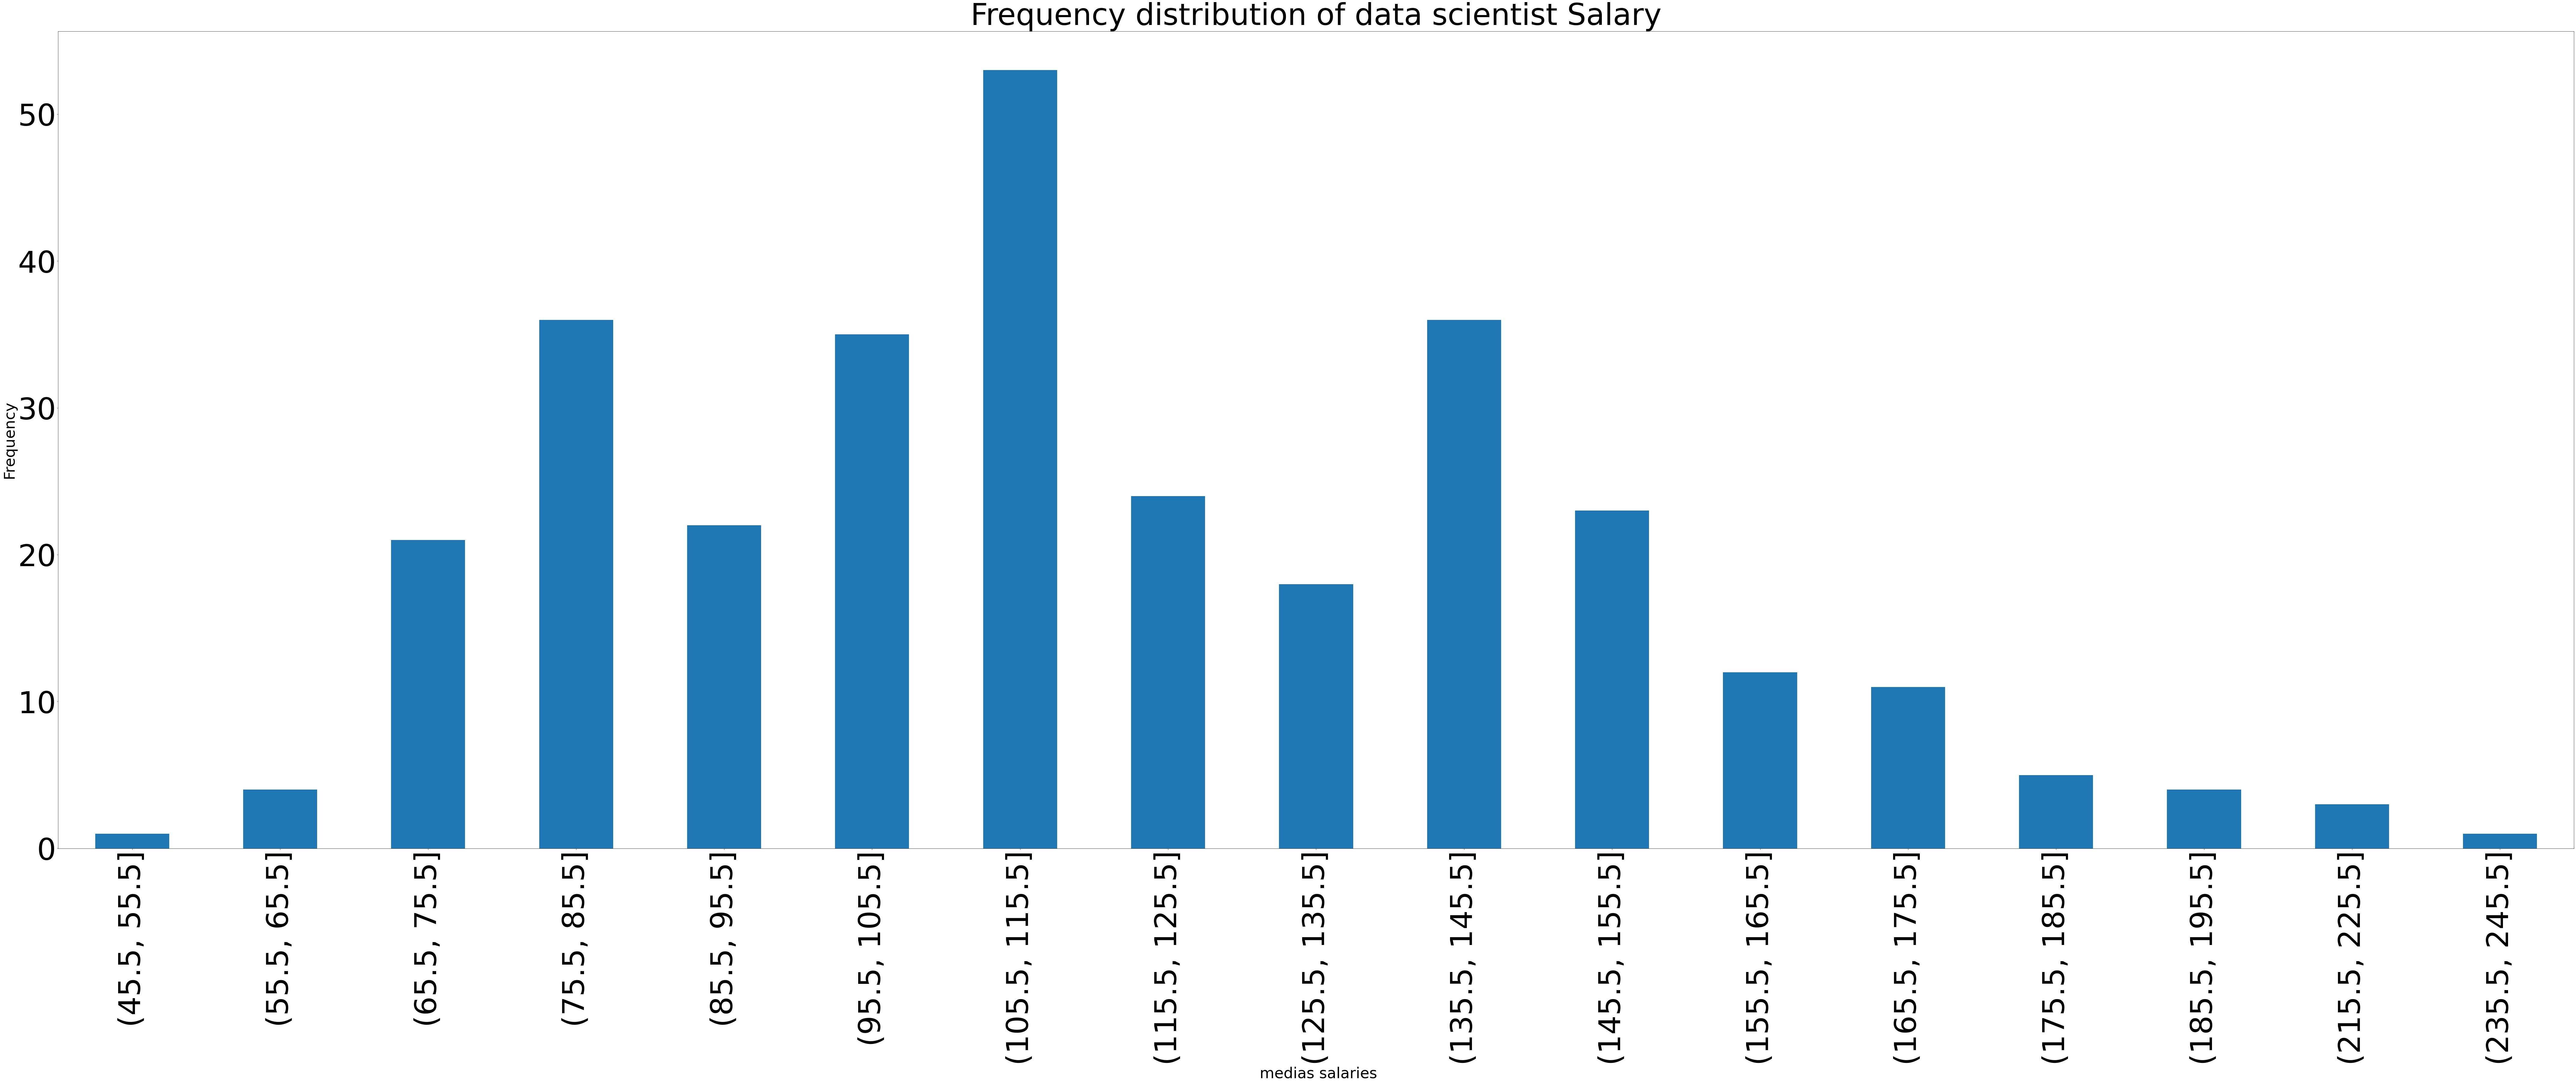

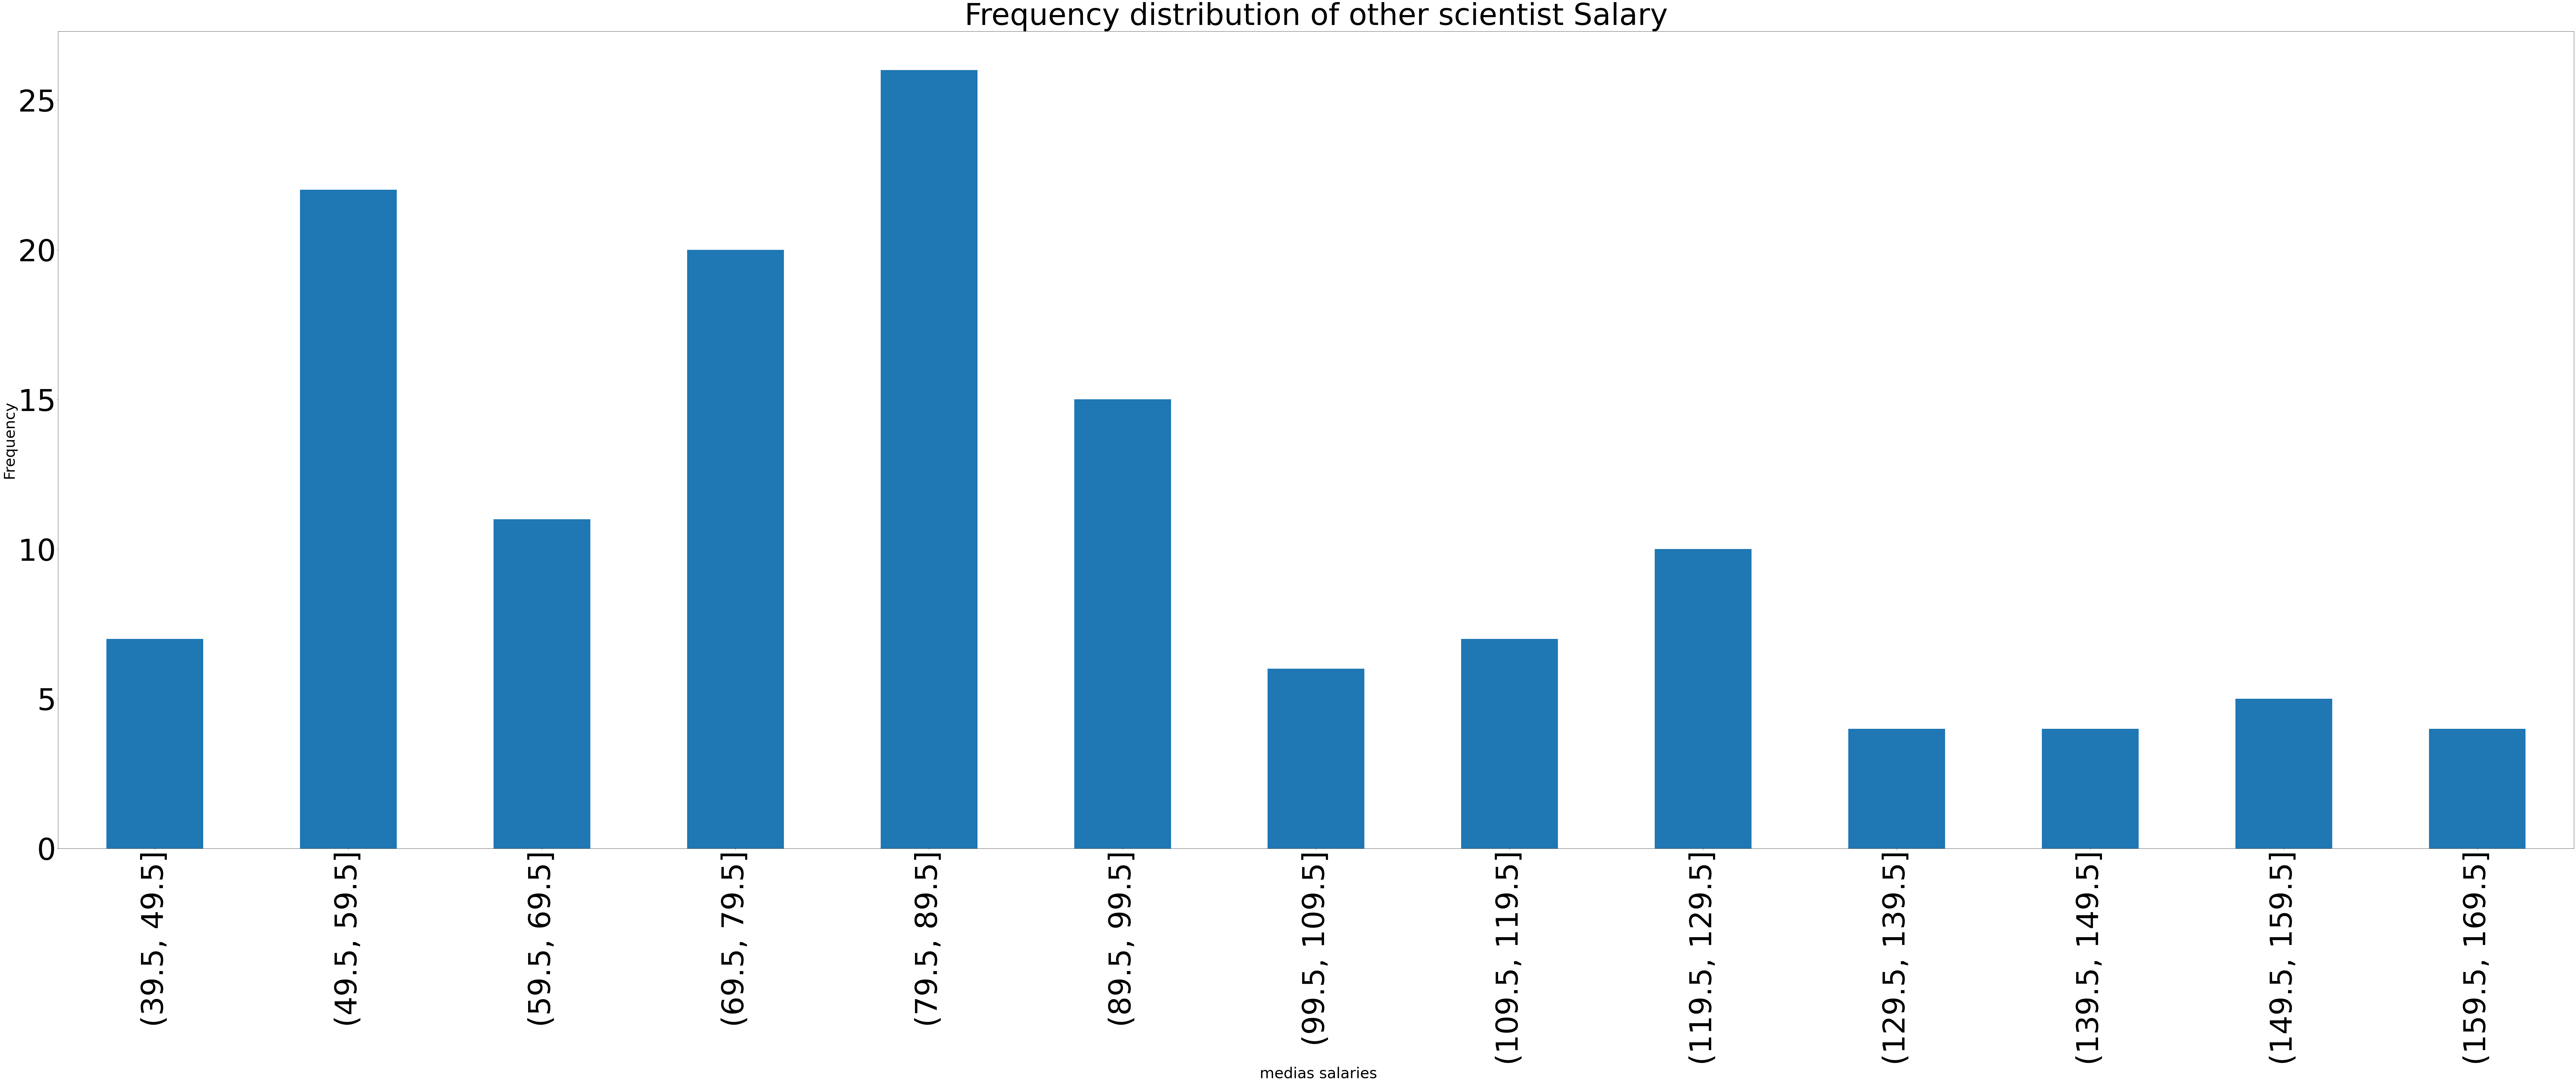

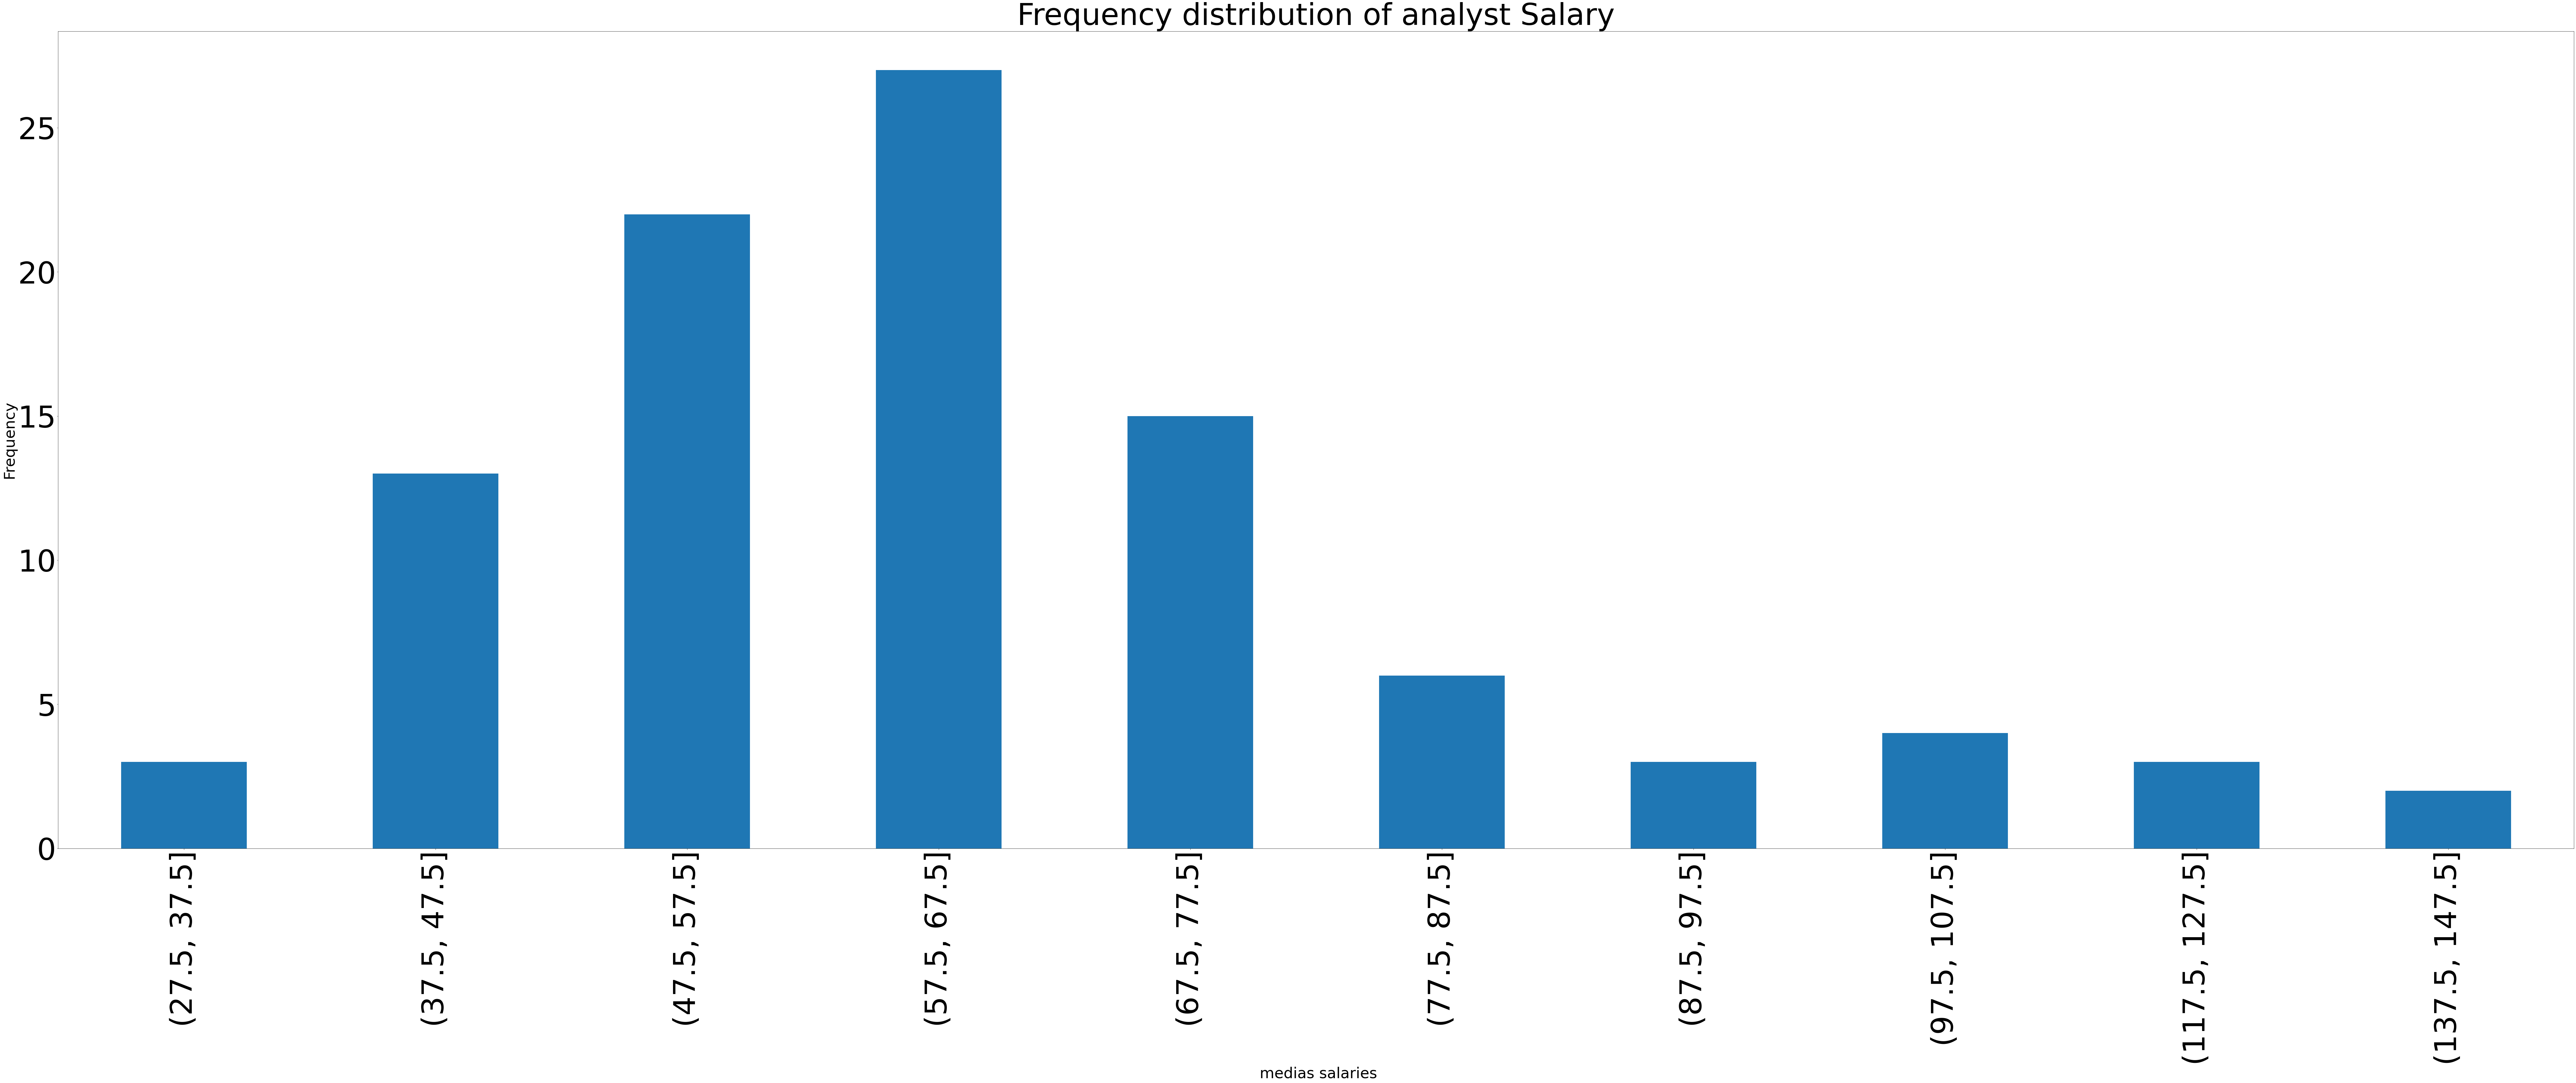

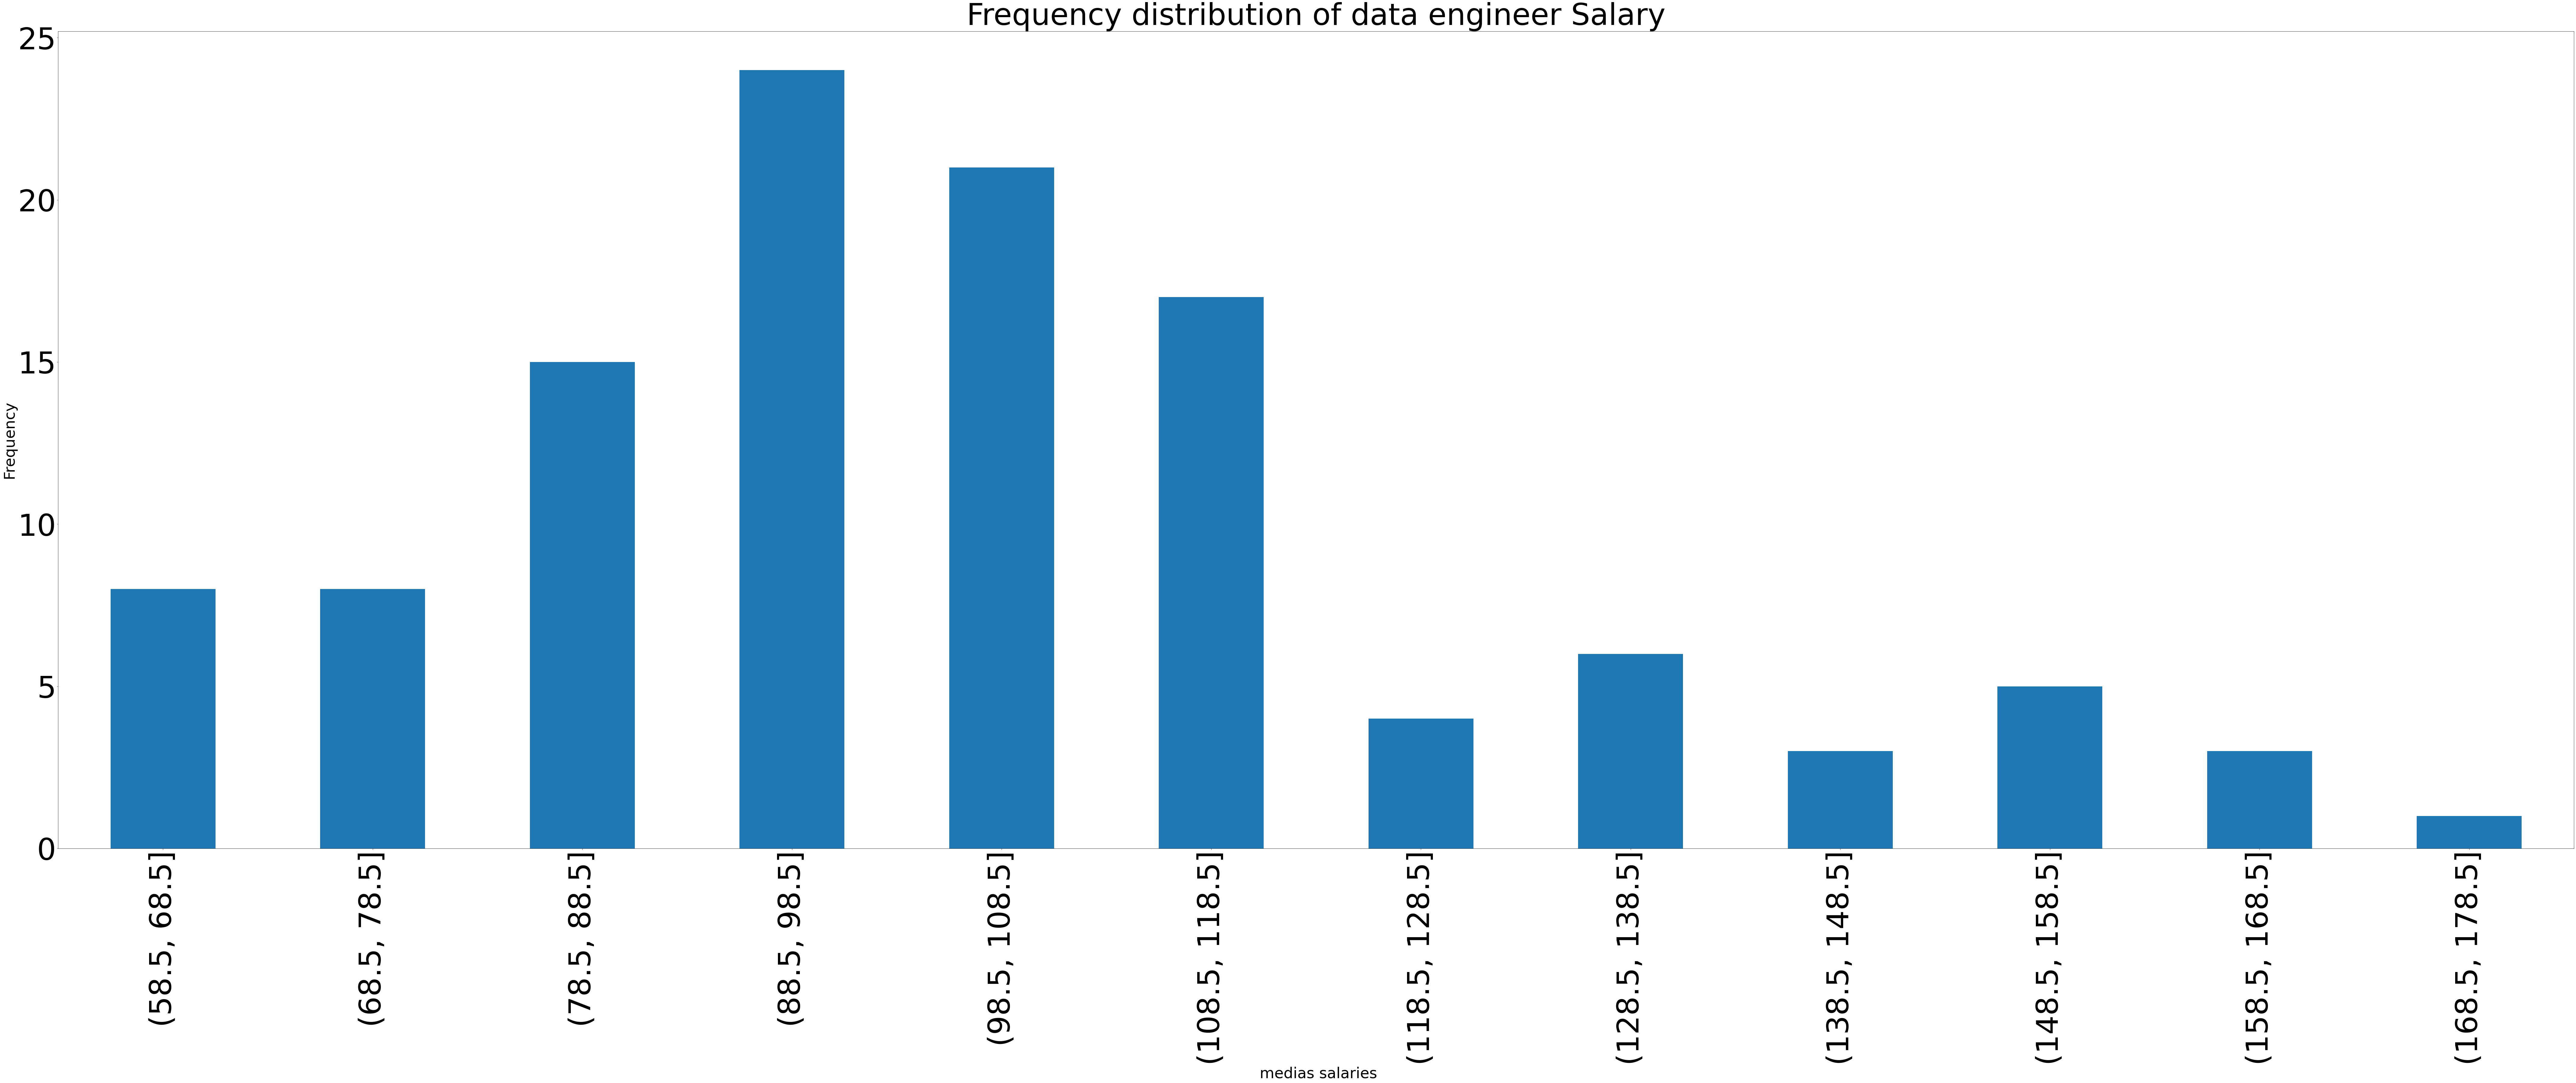

<Figure size 432x288 with 0 Axes>

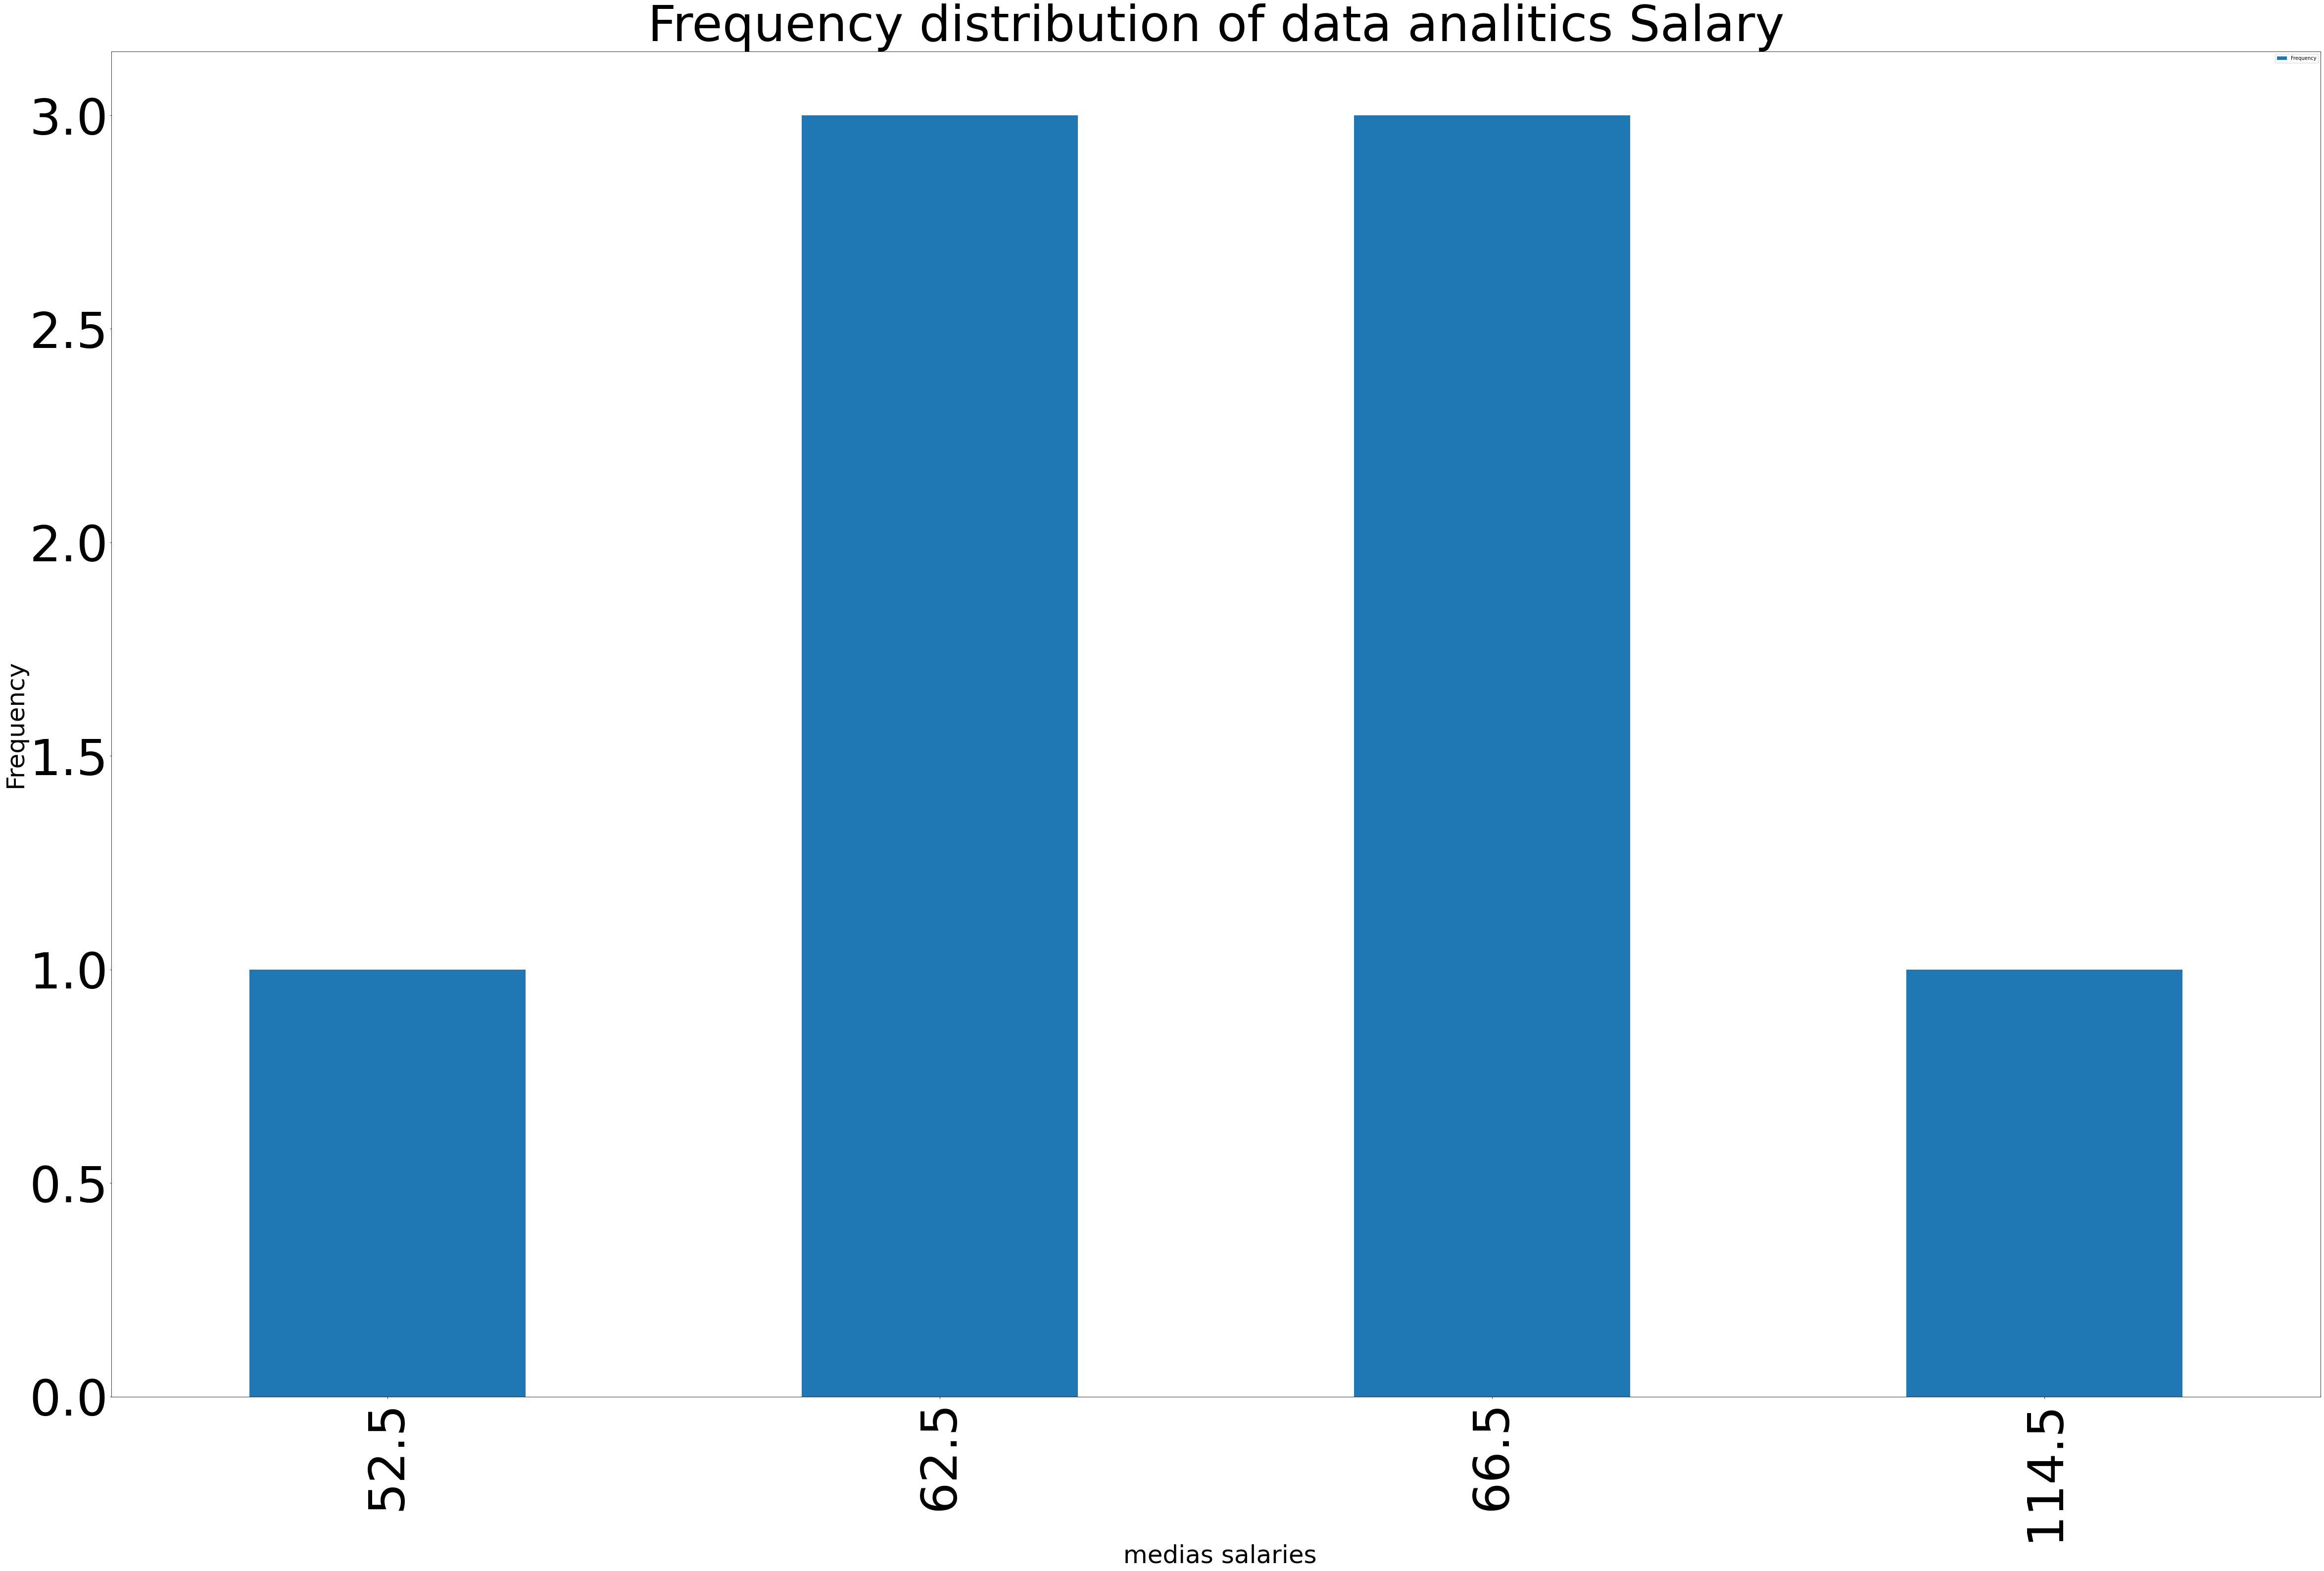

<Figure size 432x288 with 0 Axes>

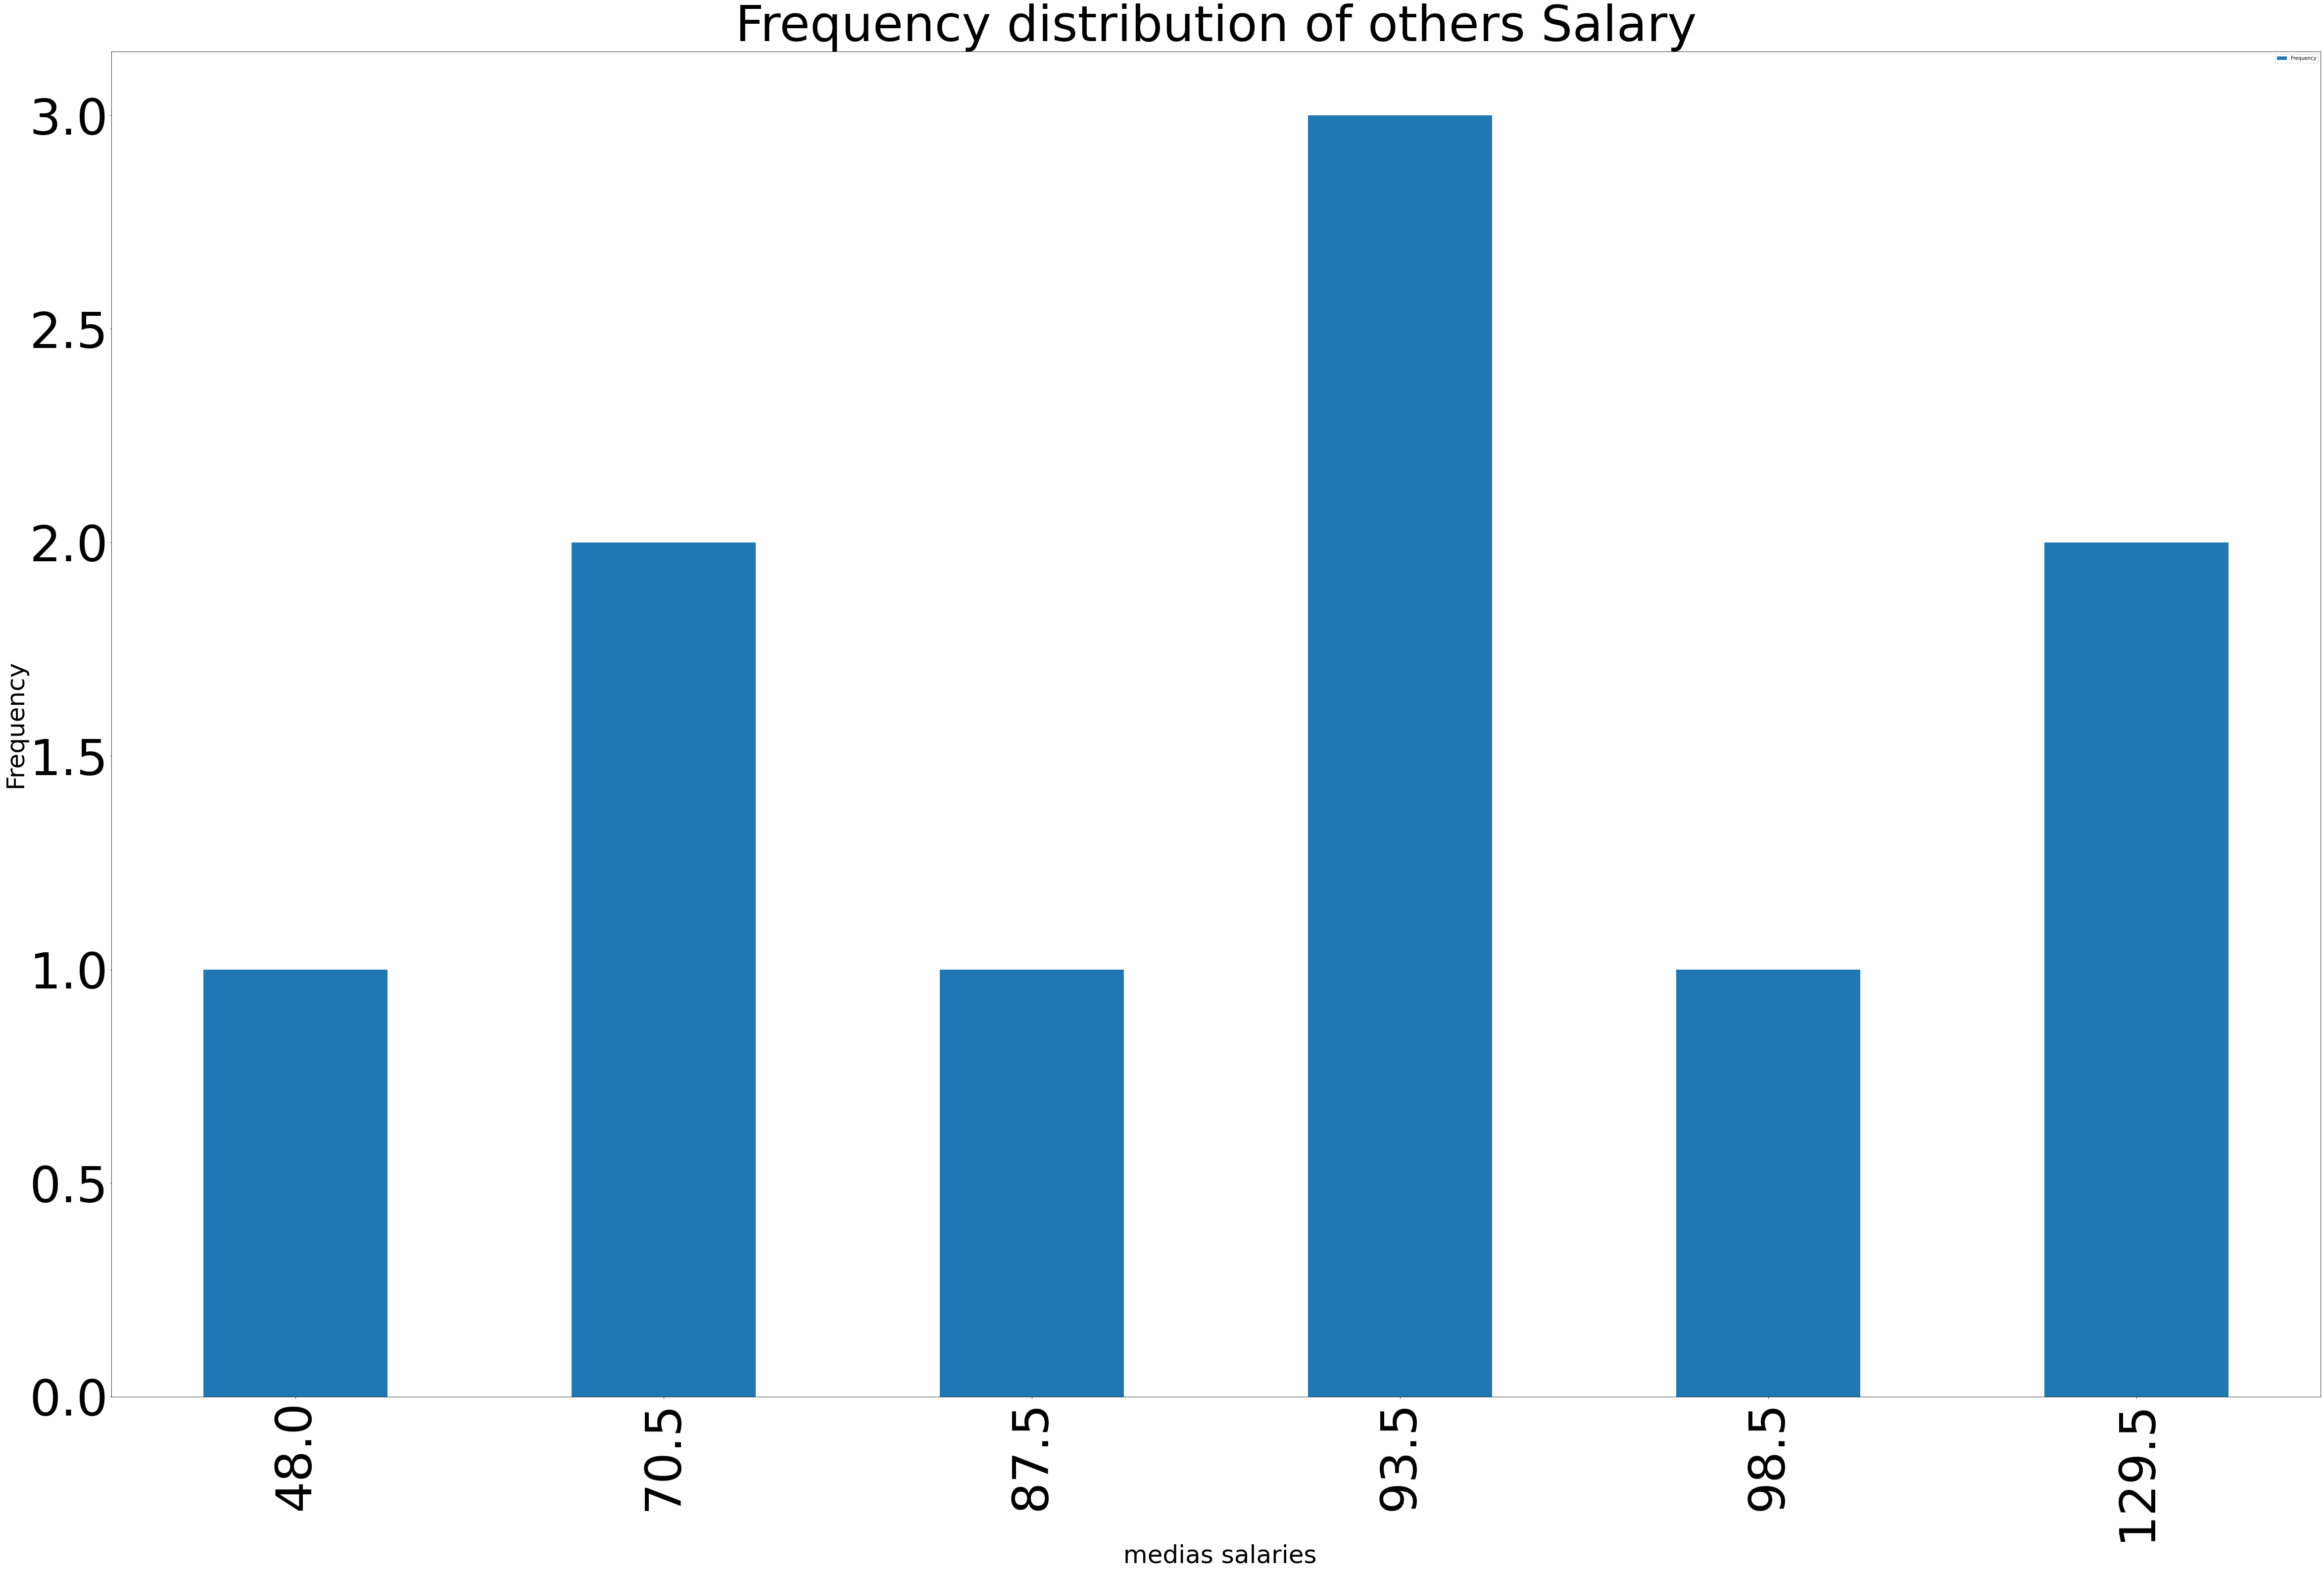

<Figure size 432x288 with 0 Axes>

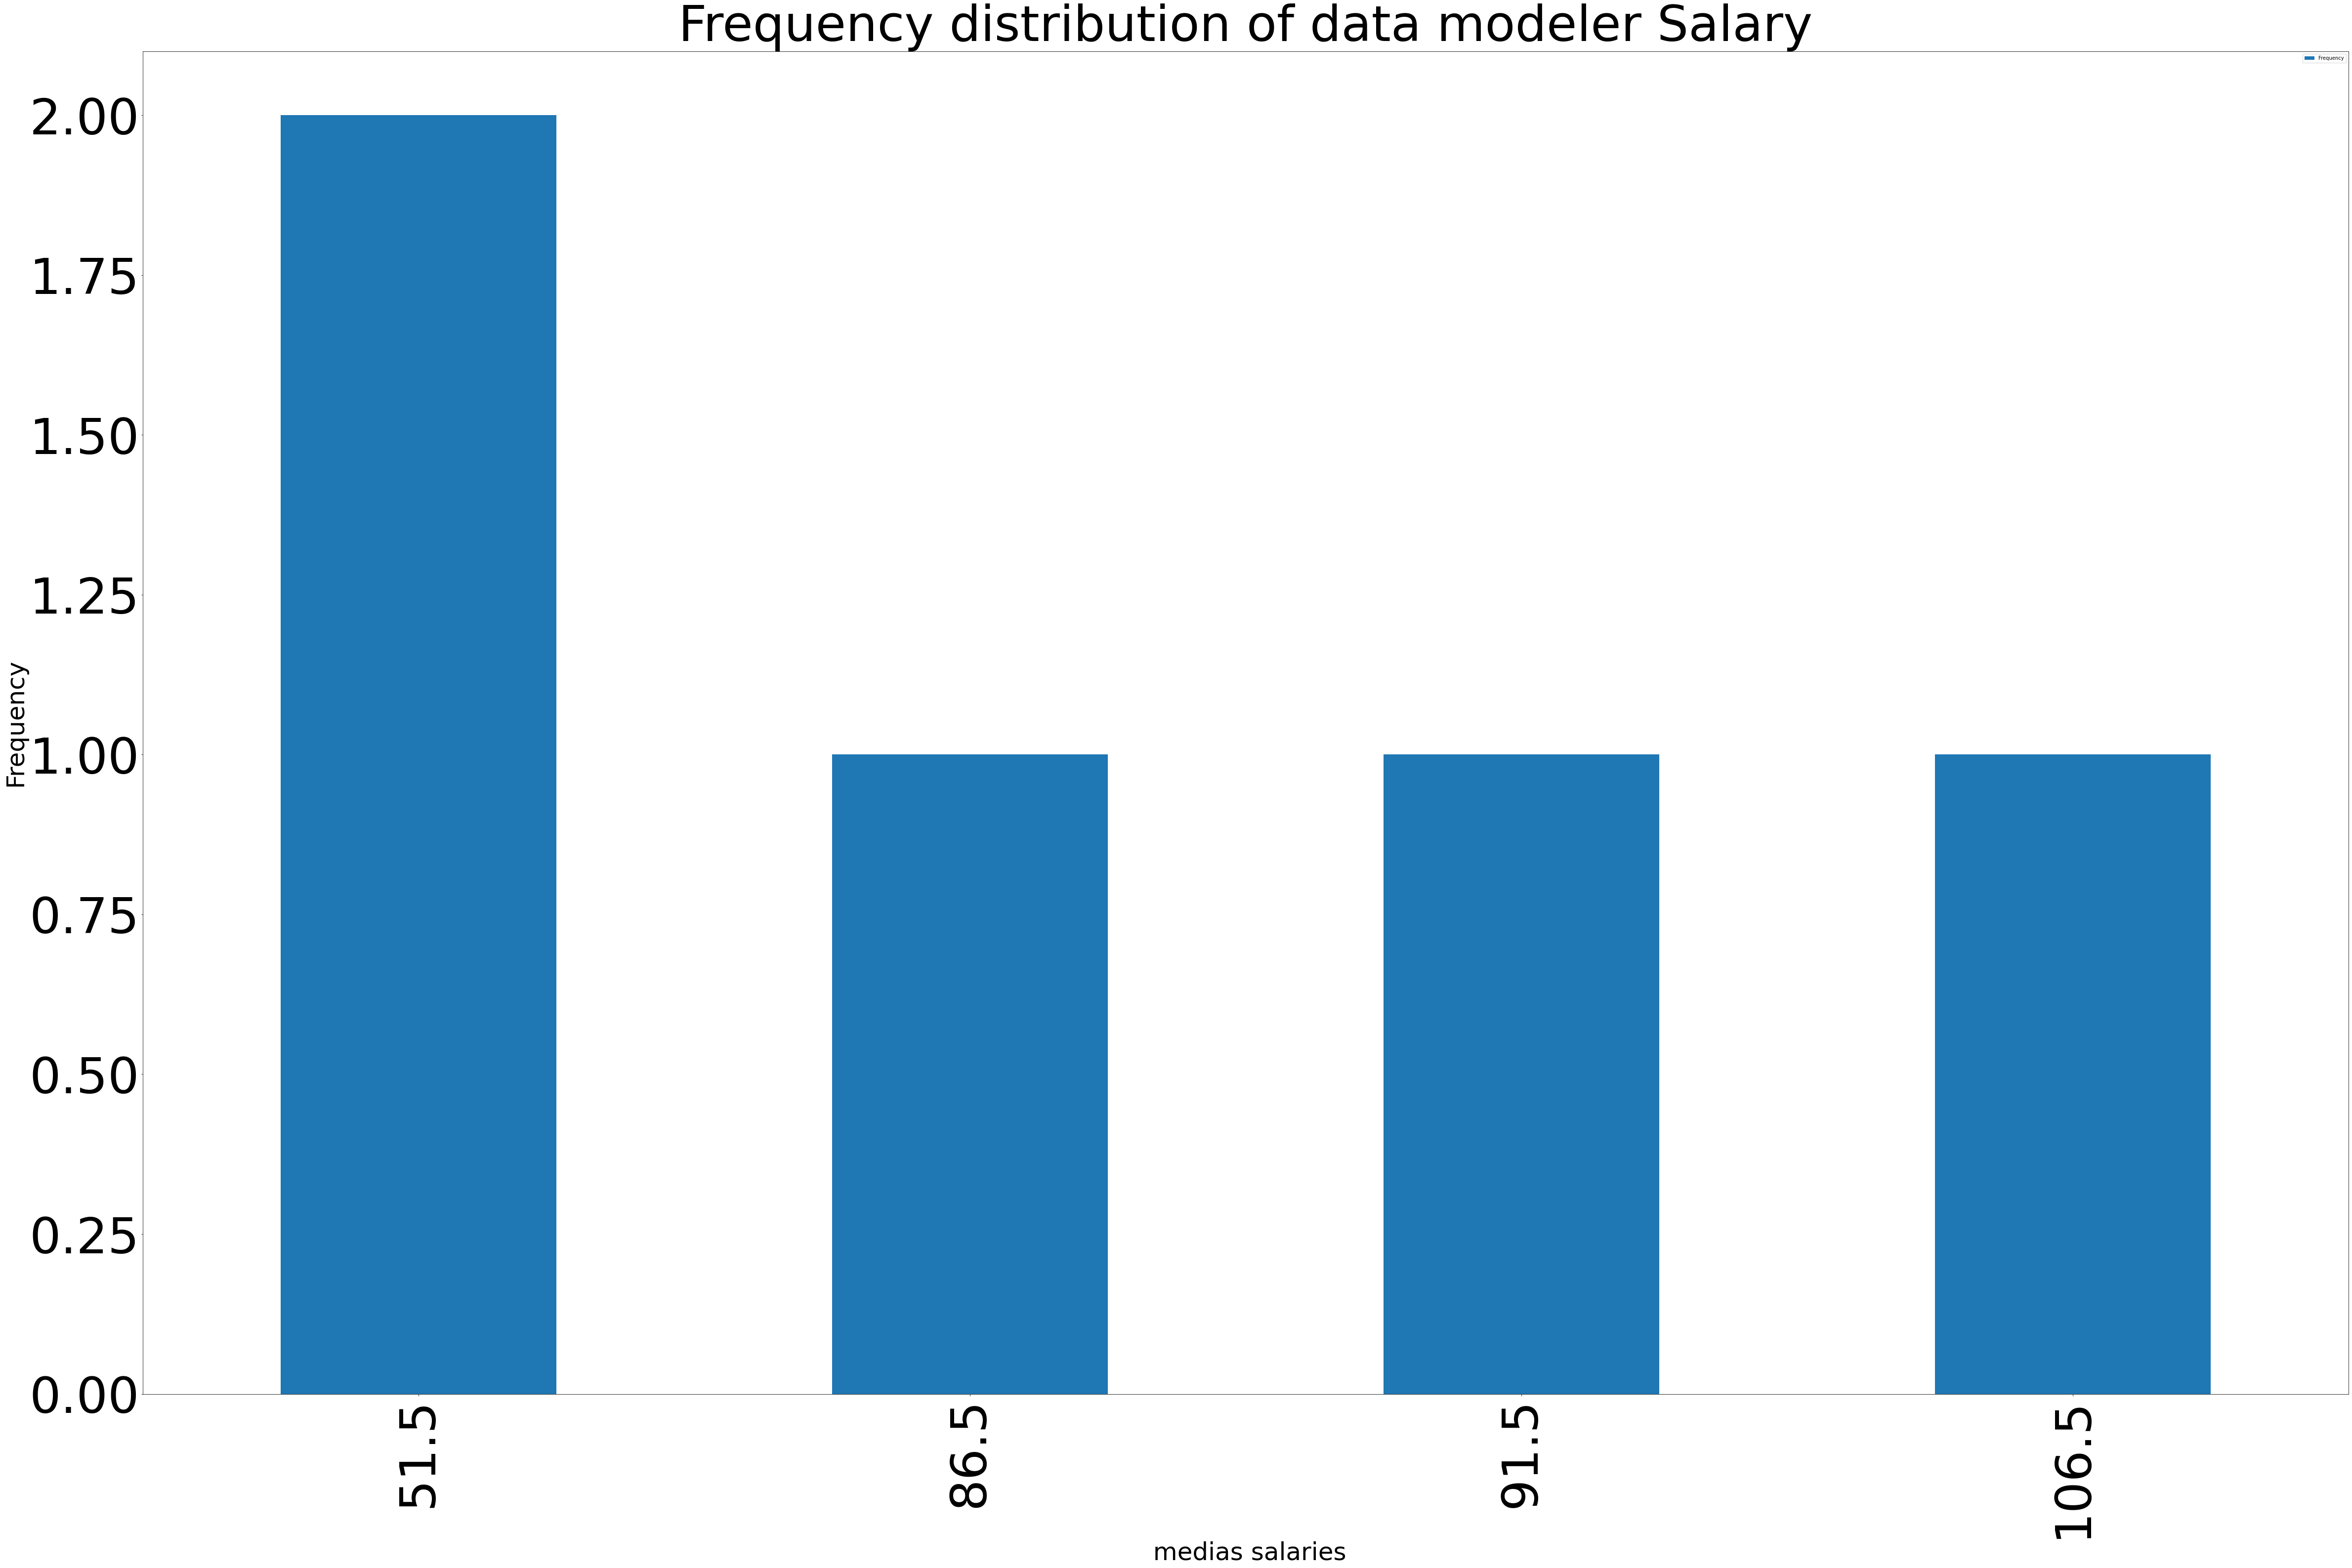

<Figure size 432x288 with 0 Axes>

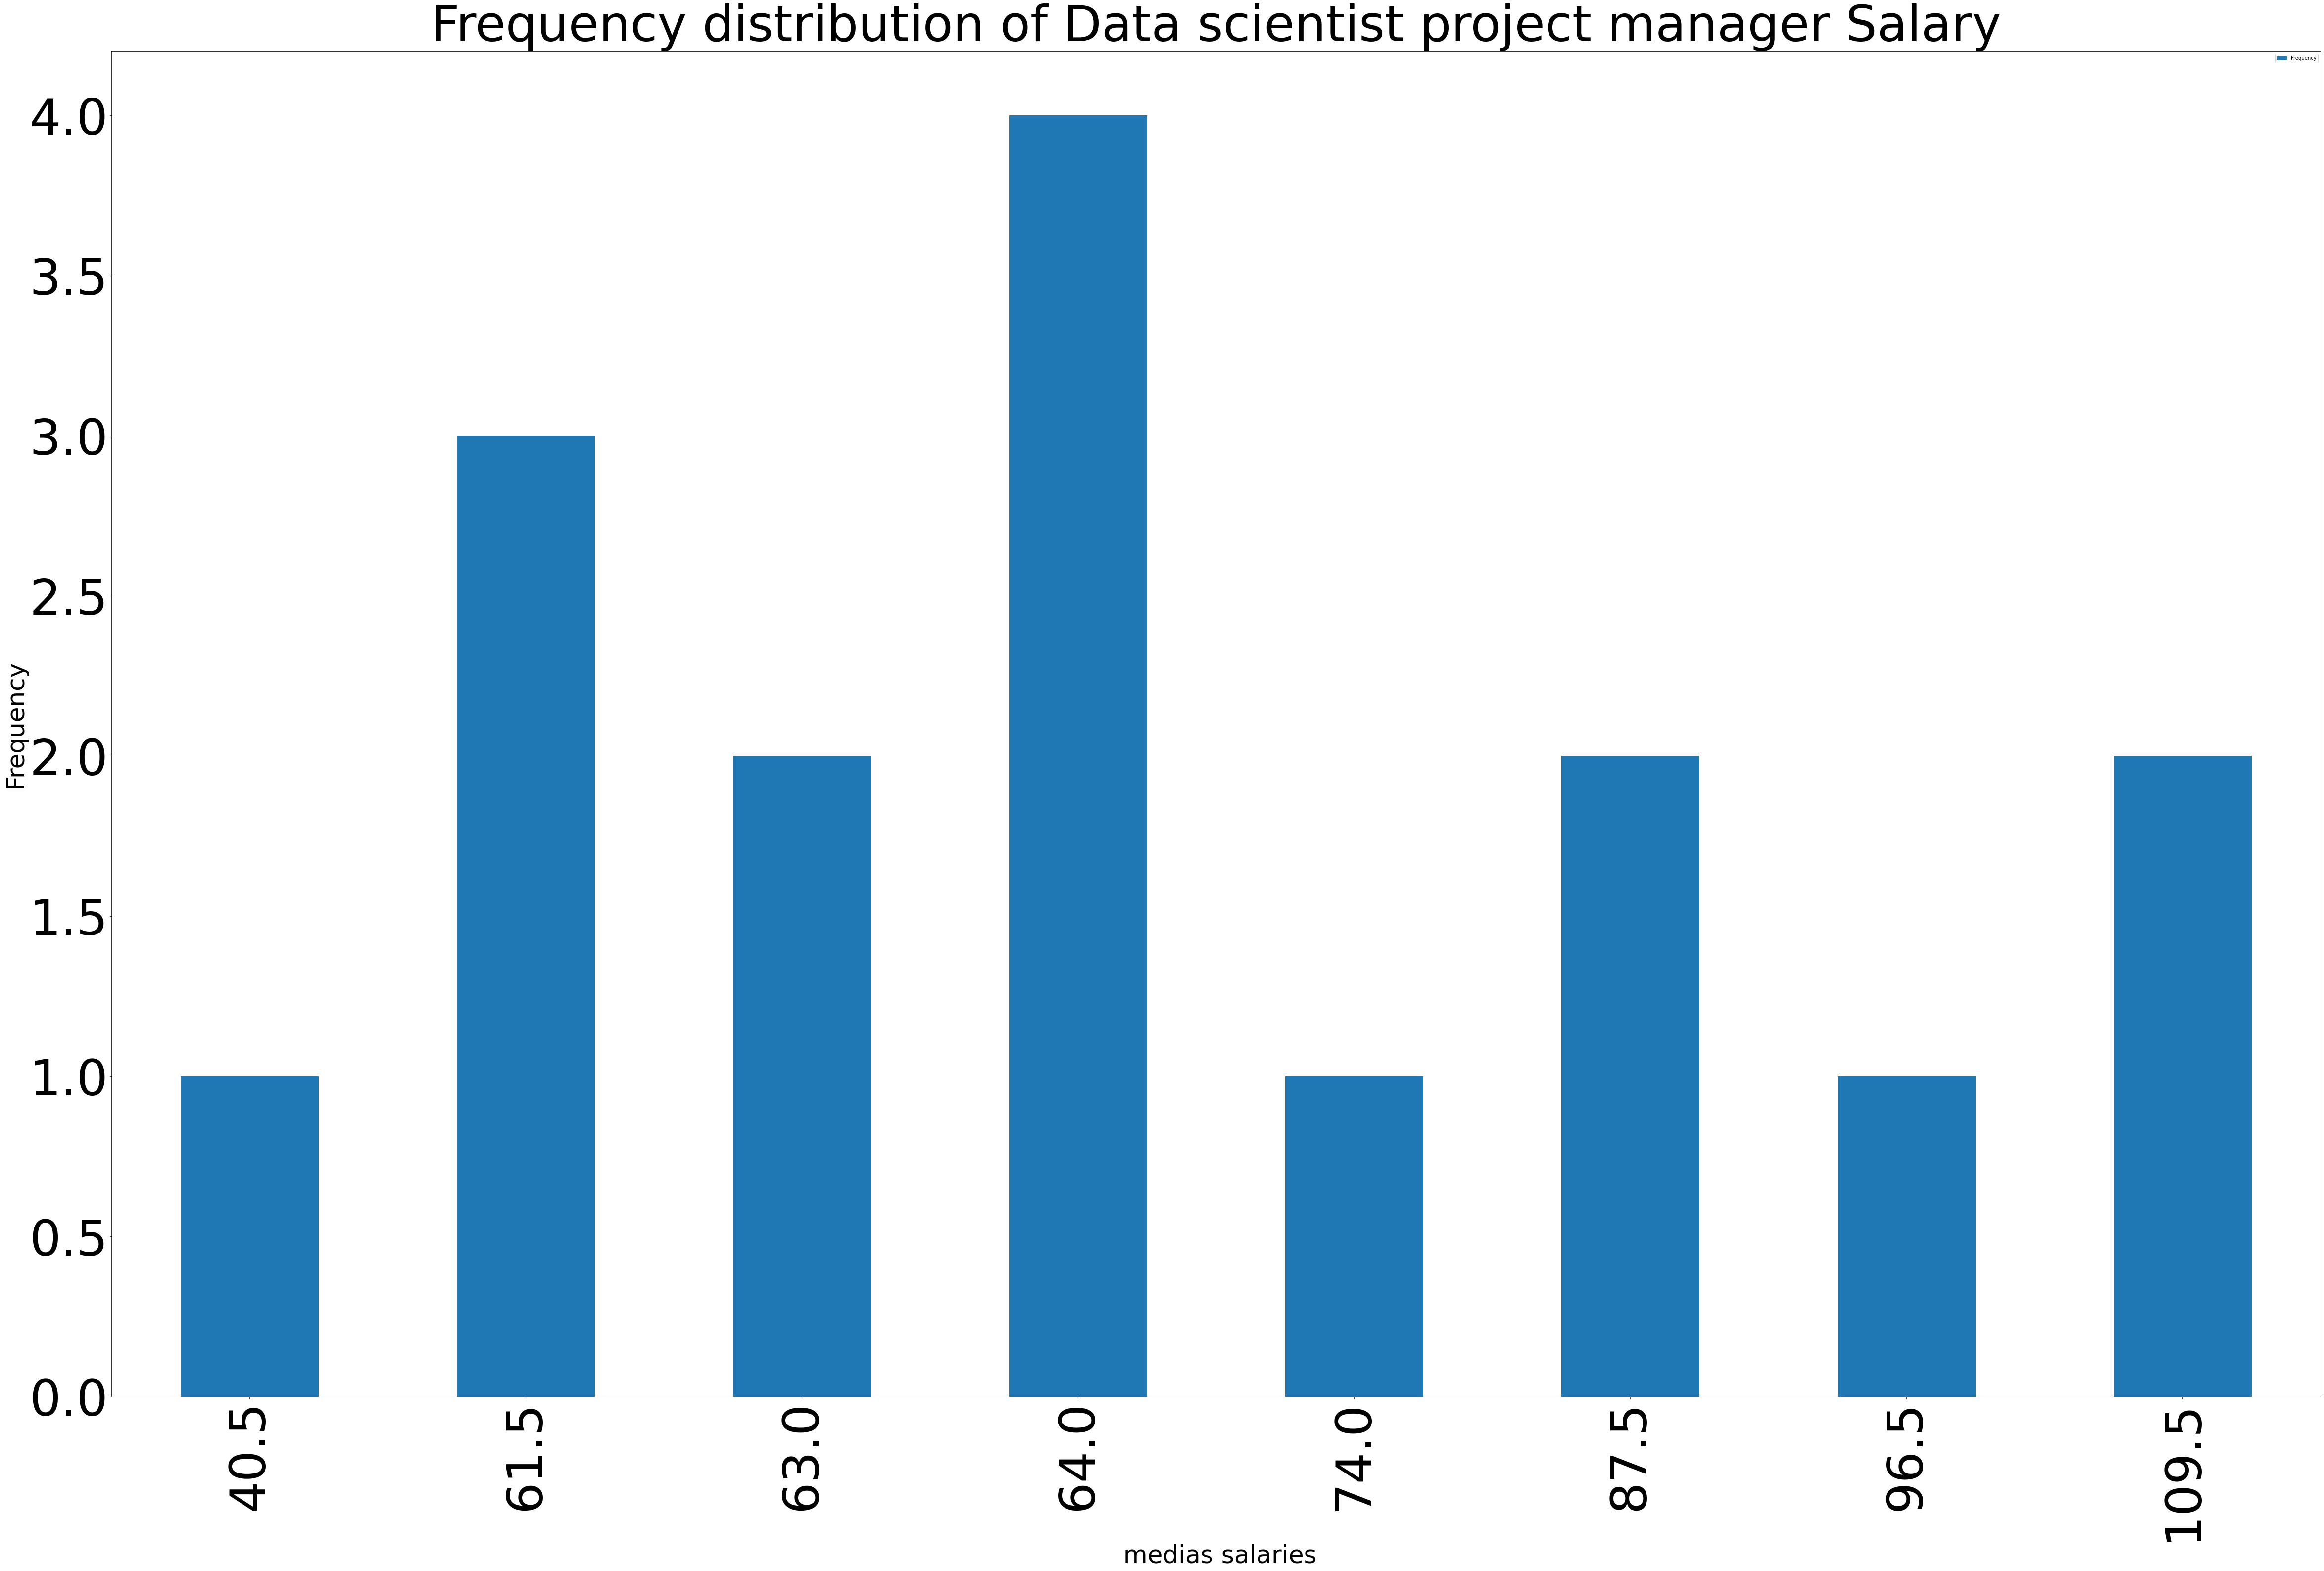

<Figure size 432x288 with 0 Axes>

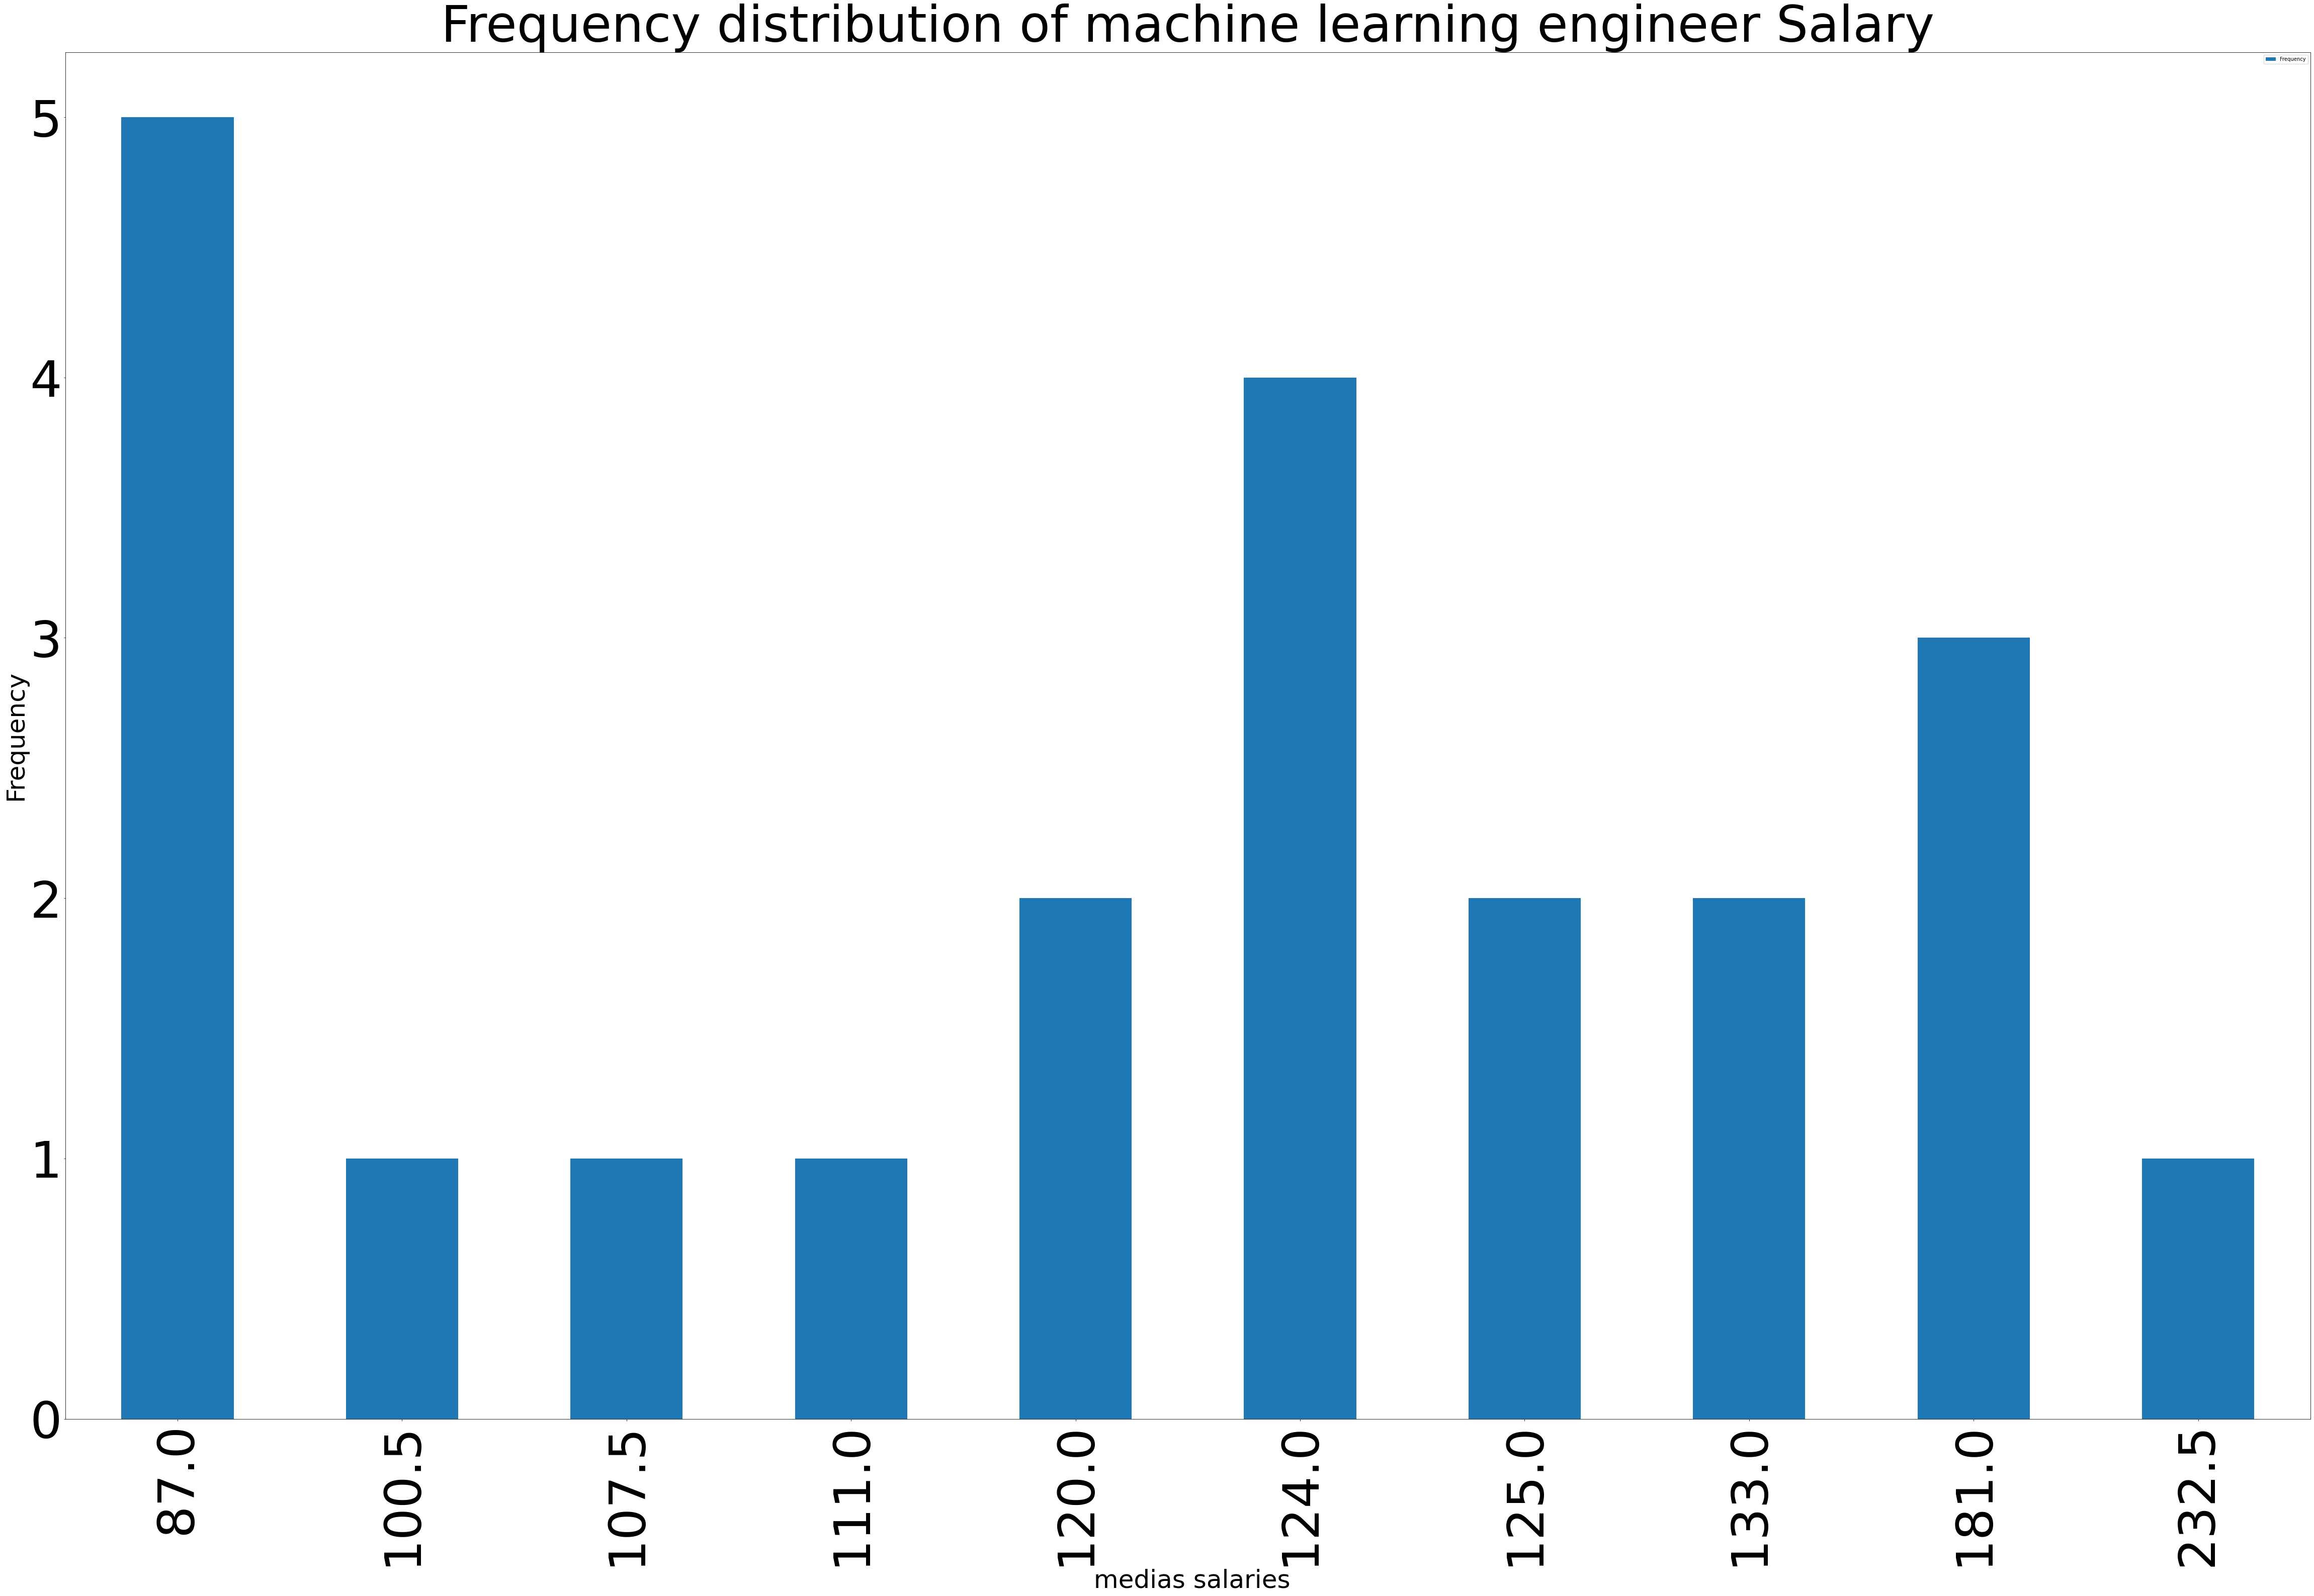

In [215]:
print_salaryFreqDistJobRole(salary_range_groups,job_roles)

In [207]:
salary_range_groups.loc['data scientist']

,Frequency
Avg Salary(K),
15.5,1
53.0,1
56.5,1
62.5,2
63.5,1
...,...
194.5,2
221.5,1
225.0,2


In [206]:
salary_range_groups.to_csv('C:/Users/lucas/Documents/data_science projects/data_scientist_salaries_analysis/tmp_df.csv')

PermissionError: [Errno 13] Permission denied: 'C:/Users/lucas/Documents/data_science projects/data_scientist_salaries_analysis/tmp_df.csv'